In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [23]:
trainingSet = pd.read_csv('data/training.csv')  # read the data
testingSet = pd.read_csv('data/testing.csv')  # read the data

In [24]:
# print(trainingSet.head(10))  # displays the first 5 elements in training data
# print(testingSet.head(10))  # displays the first 5 elements in testing data

In [25]:
# training data
X_train = trainingSet.iloc[:, :-1]  # X_train contains the features only without the class
y_train = trainingSet.iloc[:, -1]  # Y_train contains the class only without the features

In [26]:
# testing data
X_test = testingSet.iloc[:, :-1]  # X_test contains the features only without the class
y_test = testingSet.iloc[:, -1]  # Y_test contains the class only without the features

In [27]:
# print(trainingSet.head(5))  # displays the first 5 elements in training data
# print(X_train.head(5))  # displays the features of first 5 elements in training data
# print(y_train.head(5))  # displays the class of first 5 elements in training data

In [28]:
# print(testingSet.head(5))  # displays the first 5 elements in testing data
# print(X_test.head(5))  # displays the features of first 5 elements in testing data
# print(y_test.head(5))  # displays the class of first 5 elements in testing data

In [29]:
# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

In [30]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Cross validation range(1,5000) with step 1000

In [31]:
# n_scores = []
# stratifiedKF = StratifiedKFold(n_splits=10)
# for n in range(1,5000,1000):
#     ada = AdaBoostClassifier(n_estimators=n)
#     score = cross_val_score(ada, X_train, y_train, cv=stratifiedKF, scoring='accuracy')
#     n_scores.append(score.mean())
#     print("N = " + str(n) + " and mean score from 10 folds is " + str(score.mean()))

In [32]:
# plt.figure(figsize=(12,8))
# plt.plot(range(1,5000,1000), n_scores, color='red', linestyle='dashed', marker='o',
#         markerfacecolor='blue', markersize=10)
# plt.title('Accuracy Rate for N-Estimators Value')
# plt.xlabel('N-Estimators Value')
# plt.ylabel('Accuracy')

## Cross validation range(1,1000) with step 30

In [33]:
# n_scores = []
# stratifiedKF = StratifiedKFold(n_splits=10)
# for n in range(1,1000,30):
#     ada = AdaBoostClassifier(n_estimators=n)
#     score = cross_val_score(ada, X_train, y_train, cv=stratifiedKF, scoring='accuracy')
#     n_scores.append(score.mean())
#     print("N = " + str(n) + " and mean score from 10 folds is " + str(score.mean()))

In [34]:
# plt.figure(figsize=(12,8))
# plt.plot(range(1,1000,30), n_scores, color='red', linestyle='dashed', marker='o',
#         markerfacecolor='blue', markersize=10)
# plt.title('Accuracy Rate for N-Estimators Value')
# plt.xlabel('N-Estimators Value')
# plt.ylabel('Accuracy')

## Cross validation range(100,500) with step 20

In [12]:
n_scores = []
stratifiedKF = StratifiedKFold(n_splits=10)
for n in range(100,500,20):
    ada = AdaBoostClassifier(n_estimators=n)
    score = cross_val_score(ada, X_train, y_train, cv=stratifiedKF, scoring='accuracy')
    n_scores.append(score.mean())
    print("N = " + str(n) + " and mean score from 10 folds is " + str(score.mean()))

N = 100 and mean score from 10 folds is 0.8240073338259035
N = 120 and mean score from 10 folds is 0.8231524049293526
N = 140 and mean score from 10 folds is 0.8237940006750039
N = 160 and mean score from 10 folds is 0.8235803254613285
N = 180 and mean score from 10 folds is 0.823688759361118
N = 200 and mean score from 10 folds is 0.8231542292641546
N = 220 and mean score from 10 folds is 0.8244361665252807
N = 240 and mean score from 10 folds is 0.8231549133897053
N = 260 and mean score from 10 folds is 0.8213395862408669
N = 280 and mean score from 10 folds is 0.8218732041704293
N = 300 and mean score from 10 folds is 0.8221932609072417
N = 320 and mean score from 10 folds is 0.821552349287141
N = 340 and mean score from 10 folds is 0.8208043720183527
N = 360 and mean score from 10 folds is 0.8209104114787145
N = 380 and mean score from 10 folds is 0.8216588448312034
N = 400 and mean score from 10 folds is 0.821659414935829
N = 420 and mean score from 10 folds is 0.8210186173366536


Text(0, 0.5, 'Accuracy')

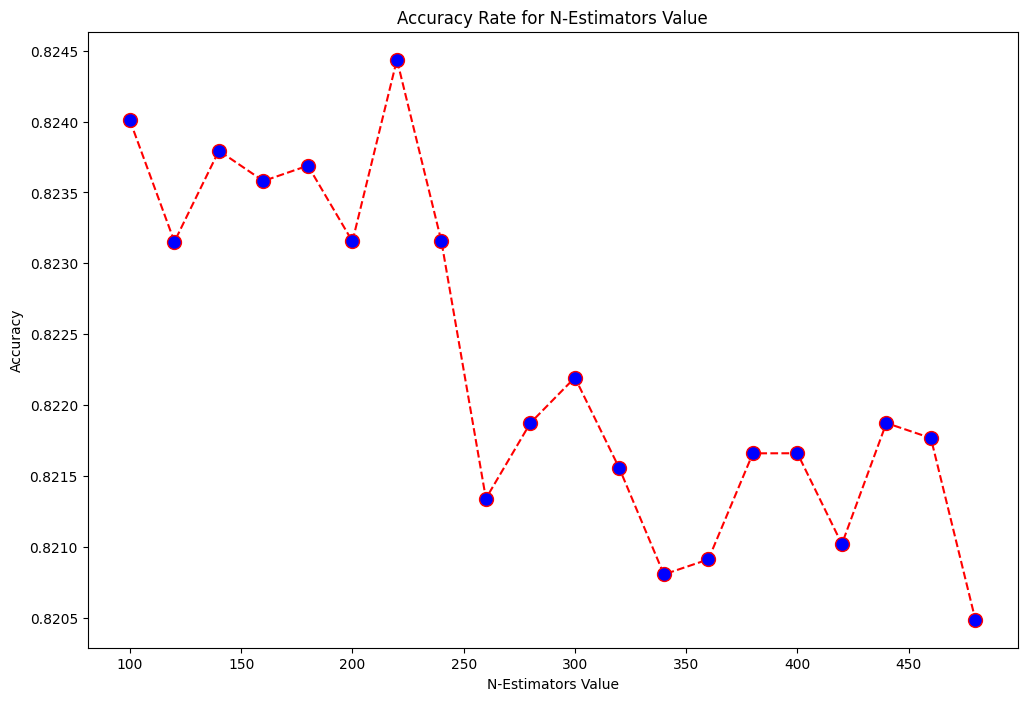

In [35]:
plt.figure(figsize=(12,8))
plt.plot(range(100,500,20), n_scores, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate for N-Estimators Value')
plt.xlabel('N-Estimators Value')
plt.ylabel('Accuracy')

In [36]:
maxAcc = max(n_scores)
max_index = n_scores.index(maxAcc)
n_est = 100 + 20*max_index
print(n_est, n_scores[max_index])

220 0.8244361665252807


## Build the model using the tuned parameter

In [43]:
ada = AdaBoostClassifier(n_estimators=n_est)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=220)

In [44]:
y_pred = ada.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2006
           1       0.83      0.82      0.83      2006

    accuracy                           0.83      4012
   macro avg       0.83      0.83      0.83      4012
weighted avg       0.83      0.83      0.83      4012



In [46]:
cm = confusion_matrix(y_test, y_pred)

In [52]:
labels = ['h','g']
columns = [f'Predicted {label}' for label in labels]
index = [f'Actual {label}' for label in labels]
table = pd.DataFrame(cm, columns=columns, index=index)
table

,Predicted h,Predicted g
Actual h,1668,338
Actual g,360,1646


In [48]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = cm[0,0]/(cm[0,0] + cm[0,1])
f1 = f1_score(y_test, y_pred)

print('model_accuracy = ', acc)
print('model_precision = ', prec)
print('model_recall = ', recall)
print('model_specificity = ', specificity)
print('model_f1 = ', f1)

model_accuracy =  0.8260219341974078
model_precision =  0.8296370967741935
model_recall =  0.8205383848454636
model_specificity =  0.8315054835493519
model_f1 =  0.825062656641604
